In [3]:
import pickle
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import pandas as pd
from audio_processing import FeatureSet
import matplotlib.pyplot as plt

D:\Archiv\Studium\Master\6.-Semester\Masters_Thesis\Git\acoustic_covid_detection\python


In [4]:
with open(f"data/Coswara_processed/pickles/2023_02_21_logmel_cough_22kHz_new_augmented.pickle", "rb") as f:
    feature_set1 = pickle.load(f)

In [5]:
print(feature_set1)


Feature Set - #Participants: 3200
----------------------------------------------------
type_of_features:    logmel
n_time_steps:        224
n_features:          224
sample_rate:         22050
n_fft:               8192
window_length:       512
hop_size:            256
fmin:                0
fmax:                11025
hop_size_ms:         11.61
window_length_ms:    23.22
duration_seconds:    2.6
fft_res_hz:          2.69
-------------------Augmentations--------------------
AddGaussianNoise:    'probability': 0.8, 'min_amplitude': 0.0003, 'max_amplitude': 0.02
PitchShift:          'probability': 0.8, 'min_semitones': -3, 'max_semitones': 3
TimeStretch:         'probability': 0.8, 'min_rate': 0.85, 'max_rate': 1.15
Gain:                'probability': 0.8, 'min_gain_in_db': -40, 'max_gain_in_db': 16
----------------------------------------------------


In [7]:
feature_set1.augmentations_per_label

(1, 4)

In [ ]:
with open(f"data/Coswara_processed/pickles/2023_02_11_cough15mfcc_highres_corrected.pickle", "rb") as f:
    feature_set2 = pickle.load(f)

In [26]:
feature_set2.participants[0].recordings

{'breathing-deep': <audio_recording.AudioRecording at 0x21708a21dc0>}

In [38]:
with open(f"data/Coswara_processed/pickles/2023_02_11_logmel_cough_fs22kHz_augmented.pickle", "rb") as f:
    feature_set3 = pickle.load(f)

Duration of the Recording: 11.96


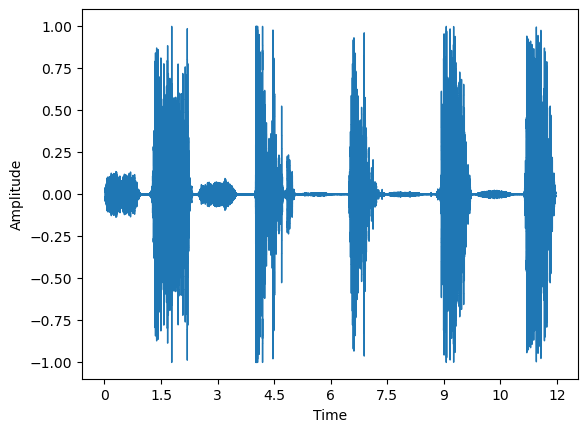

In [42]:
feature_set1.participants[1].recordings[feature_set1.types_of_recording].show_waveform(36)

In [40]:
feature_set3

In [41]:
def pretty_print_dict(dictionary):
    for k, v in dictionary.items():
        offset = 20 - len(k)
        offset = " " * offset
        print(f"{k}:{offset}{v}")

In [43]:
print(f"Type of Recording:   {feature_set3.types_of_recording}\n")
print(f"Augmentations:")
print(feature_set3.augmentations)
pretty_print_dict(feature_set3.audio_parameters)

Type of Recording:   cough-heavy

Augmentations:
type_of_features:    logmel
n_time_steps:        224
n_features:          224
sample_rate:         22050
n_fft:               8192
window_length:       512
hop_size:            256
fmin:                0
fmax:                11025


In [49]:
print(feature_set3.augmentations.transforms[0])

In [13]:
import librosa


In [21]:

paths = ["data/Coswara_processed/Recordings/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough-heavy.wav",
         "data/Coswara_processed/Recordings/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough-shallow.wav"]

In [24]:
393216 + 135168


528384

In [27]:
audio = np.array([])
for path in paths:
    audio_temp, sr = librosa.load(path, sr=None)
    audio = np.concatenate([audio, audio_temp])
    print(audio.shape)    
    print(audio_temp.shape)

(393216,)
(393216,)
(528384,)
(135168,)


# random transfer function simulations

In [21]:
n_freq_bins = 40

In [22]:
flat_tf = np.ones((n_freq_bins,1))
flat_tf.shape

(40, 1)

In [46]:
np.random.rand(10).shape

(10,)

(0.0, 1.5)

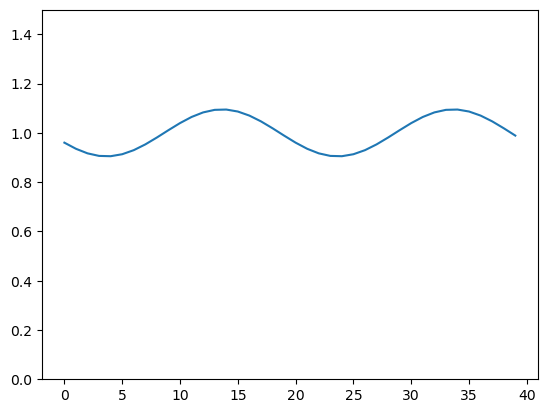

In [67]:
argument = np.arange(n_freq_bins)/n_freq_bins*2
argument += np.random.rand()
sinus = np.sin(2*np.pi*argument)

plt.plot(1+sinus*np.random.randn()*0.25)
plt.ylim(0,1.5)

In [209]:
def get_tf(k=0.1, sinosoid_ratios=[10, 4, 2, 1], n_freq_bins=224):
    n_sinosoids = len(sinosoid_ratios)
    sinosoid_ratios = np.expand_dims(np.array(sinosoid_ratios), 1).astype("float")
    sinosoid_ratios /= sinosoid_ratios.sum()
    sinosoid_coefs = sinosoid_ratios * k
    
    freq_multiplicator = np.expand_dims(np.arange(n_sinosoids) + 1, 1)
    
    argument = np.tile(np.arange(n_freq_bins)/n_freq_bins/2, (n_sinosoids,1) ).astype("float")
    argument *= freq_multiplicator
    argument += np.random.uniform(size=(n_sinosoids,1))    
    tf = np.sin(2*np.pi*argument)
    tf *= sinosoid_coefs
    tf = tf.sum(axis=0)
    return tf

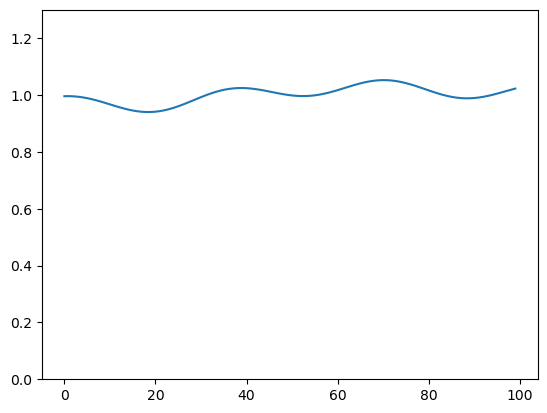

In [247]:
tf = get_tf(k=0.1, sinosoid_ratios=[8, 3, 4, 2, 2, 5], n_freq_bins=100)
plt.plot(1+tf.transpose())
_ = plt.ylim(0,1.3)